<a href="https://colab.research.google.com/github/muskan155/Projects/blob/main/Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests
!pip install beautifulsoup4
!pip install lxml
!pip install pandas
!pip install matplotlib
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Web Scraping

In [ ]:
url = 'https://www.worldometers.info/coronavirus/'
import requests
content = requests.get(url).content # HTML

b'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n\n\n\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n\n    <title>COVID - Coronavirus Statistics - Worldometer</title>\n    <meta name="description" content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates.">\n\n\n    \n\t<!-- Favicon -->\n\t<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n\t<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n\t<link rel="apple-touch-icon" sizes="60x60" href="/favicon/apple-icon-60x60.png">\n\t<link rel="apple-touch-icon" sizes="72x72" href="/favicon/apple-icon-72x72.png">\n\t<li
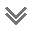

In [ ]:
content

In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(content, 'html.parser')

In [ ]:
tbody = soup.find('tbody')

In [ ]:
table_row = tbody.find_all('tr')

In [ ]:
table_row[8]

<tr style="">
<td style="font-size:12px;color: grey;text-align:center;vertical-align:middle;">1</td>
<td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/us/">USA</a></td>
<td style="font-weight: bold; text-align:right">106,791,968</td>
<td style="font-weight: bold; text-align:right;"></td>
<td style="font-weight: bold; text-align:right;">1,162,699                                </td>
<td style="font-weight: bold; 
                                    text-align:right;"></td>
<td style="font-weight: bold; text-align:right">104,769,891</td>
<td style="font-weight: bold; text-align:right;"></td>
<td style="text-align:right;font-weight:bold;">859,378</td>
<td style="font-weight: bold; text-align:right">1,152</td>
<td style="font-weight: bold; text-align:right">318,967</td>
<td style="font-weight: bold; text-align:right">3,473</td>
<td style="font-weight: bold; text-align:right">1,179,087,242</td>
<td style="font-weight: bold; text-align:right">3,521

In [ ]:
all_data = []
for row in range(8, len(table_row)):
    cd = []
    country_data = table_row[row].find_all('td')
    for item in country_data:
        cd.append(item.text)

    all_data.append(cd)

In [ ]:
all_data

[['1',
  'USA',
  '106,791,968',
  '',
  '1,162,699                                ',
  '',
  '104,769,891',
  '',
  '859,378',
  '1,152',
  '318,967',
  '3,473',
  '1,179,087,242',
  '3,521,711',
  '334,805,269 ',
  'North America',
  '3',
  '288',
  '0',
  '',
  '',
  '2,567'],
 ['2',
  'India',
  '44,979,402',
  '',
  '531,767                                ',
  '',
  '44,431,137',
  '',
  '16,498',
  'N/A',
  '31,977',
  '378',
  '928,487,923',
  '660,079',
  '1,406,631,776 ',
  'Asia',
  '31',
  '2,645',
  '2',
  '',
  '',
  '12'],
 ['3',
  'France',
  '40,042,410',
  '',
  '166,970                                ',
  '',
  '39,783,277',
  '',
  '92,163',
  '869',
  '610,547',
  '2,546',
  '271,490,188',
  '4,139,547',
  '65,584,518 ',
  'Europe',
  '2',
  '393',
  '0',
  '',
  '',
  '1,405'],
 ['4',
  'Germany',
  '38,417,622',
  '',
  '173,797                                ',
  '',
  '38,217,000',
  '',
  '26,825',
  'N/A',
  '457,987',
  '2,072',
  '122,332,384',
  '1,458,359'

In [ ]:
data = list(map(lambda x: x[1:6], all_data))

In [ ]:
import pandas as pd
columns = ['country', 'total_cases', 'new_cases', 'total_death', 'newa-death']
df = pd.DataFrame(data, columns = columns)
df

,country,total_cases,new_cases,total_death,newa-death
0,USA,"106,791,968",,"1,162,699",
1,India,"44,979,402",,"531,767",
2,France,"40,042,410",,"166,970",
3,Germany,"38,417,622",,"173,797",
4,Brazil,"37,511,921",,"702,116",
...,...,...,...,...,...
226,Vatican City,29,,,
227,Western Sahara,10,,1,
228,MS Zaandam,9,,2,
229,Tokelau,5,,,


In [ ]:
df.to_csv('covid-may14.csv', index = False)

In [ ]:
df = pd.read_csv('covid-may14.csv')  # read csv file in pandas

In [ ]:
df.head()  # first 5 rows

,country,total_cases,new_cases,total_death,newa-death
0,USA,"106,791,968",NaN,"1,162,699",NaN
1,India,"44,979,402",NaN,"531,767",NaN
2,France,"40,042,410",NaN,"166,970",NaN
3,Germany,"38,417,622",NaN,"173,797",NaN
4,Brazil,"37,511,921",NaN,"702,116",NaN


In [ ]:
df.tail()  # last 5 rows

,country,total_cases,new_cases,total_death,newa-death
226,Vatican City,29,NaN,,NaN
227,Western Sahara,10,NaN,1,NaN
228,MS Zaandam,9,NaN,2,NaN
229,Tokelau,5,NaN,,NaN
230,China,"503,302",NaN,"5,272",NaN


# NaN is a missing value

In [ ]:
# how to know if the data has missing value? using isna() method

In [ ]:
df.isna()

,country,total_cases,new_cases,total_death,newa-death
0,False,False,True,False,True
1,False,False,True,False,True
2,False,False,True,False,True
3,False,False,True,False,True
4,False,False,True,False,True
...,...,...,...,...,...
226,False,False,True,False,True
227,False,False,True,False,True
228,False,False,True,False,True
229,False,False,True,False,True


In [ ]:
True + True

2

In [ ]:
False + True

1

In [ ]:
False + False

0

In [ ]:
# missing data rows count in each column/
df.isna().sum()

country          0
total_cases      0
new_cases      231
total_death      0
newa-death     231
dtype: int64

<Axes: >

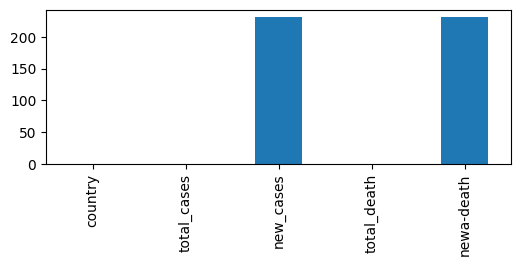

In [ ]:
df.isna().sum().plot.bar(figsize = (6, 2))

In [ ]:
df.isna().transpose()

,0,1,2,3,4,5,6,7,8,9,...,221,222,223,224,225,226,227,228,229,230
country,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
total_cases,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
new_cases,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
total_death,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
newa-death,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


<Axes: >

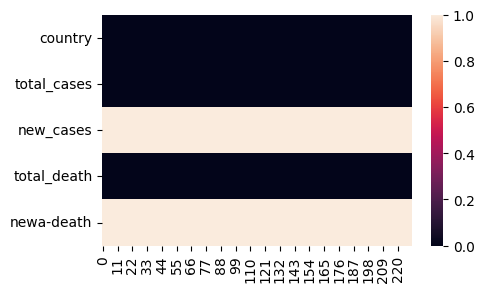

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (5, 3))
sns.heatmap(df.isna().transpose())

In [ ]:
df.shape

(231, 5)

In [ ]:
df.head()

,country,total_cases,new_cases,total_death,newa-death
0,USA,"106,791,968",NaN,"1,162,699",NaN
1,India,"44,979,402",NaN,"531,767",NaN
2,France,"40,042,410",NaN,"166,970",NaN
3,Germany,"38,417,622",NaN,"173,797",NaN
4,Brazil,"37,511,921",NaN,"702,116",NaN


In [ ]:
df['country'] # selecting columns in pandas dataframe

0                 USA
1               India
2              France
3             Germany
4              Brazil
            ...      
226      Vatican City
227    Western Sahara
228        MS Zaandam
229           Tokelau
230             China
Name: country, Length: 231, dtype: object

In [ ]:
df['country'] == 'India'

0      False
1       True
2      False
3      False
4      False
       ...  
226    False
227    False
228    False
229    False
230    False
Name: country, Length: 231, dtype: bool

In [ ]:
df.loc[df['country'] == 'India']

,country,total_cases,new_cases,total_death,newa-death
1,India,"44,979,402",NaN,"531,767",NaN


In [ ]:
df['country'] == 'Nepal'

0      False
1      False
2      False
3      False
4      False
       ...  
226    False
227    False
228    False
229    False
230    False
Name: country, Length: 231, dtype: bool

In [ ]:
df.loc[df['country'] == 'Nepal']

,country,total_cases,new_cases,total_death,newa-death
72,Nepal,"1,003,216",NaN,"12,031",NaN
